# Homework set 2

Please **submit this Jupyter notebook through Canvas** no later than **Thursday November 13**. **Submit the notebook file with your answers (as .ipynb file) and a pdf printout. The pdf version can be used by the teachers to provide feedback. On canvas there are hints about creating a nice pdf version.**

Before you hand in, please make sure the notebook runs, by running "Restart kernel and run all cells..." from the Kernel menu.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Iga Pręgowska, 14209462 

Run the following cell to import NumPy and Pyplot.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1

In this exercise we consider interpolating a function $f$ on an interval $[a,b]$ with 5 regularly spaced points, including the end points.

## (a)

Let $a = 0.2$, $b=0.6$ (so spacing $0.1$ between the points), and let $f(x) = \cos(x)$.

Compute an interpolating polynomial $p(x)$ for $f$ by solving a linear system of equations using the monomial basis. Plot $p(x)$ and $f(x)$ (I suggest using the same plot and so that they are both visible). Also plot the interpolation error. Annotate your plots.

Then do the same with $a = 1000 \cdot \pi +0.2$ and $b = 1000\cdot \pi + 0.6$.

Describe briefly any notable differences in the resulting plots.


Condition number (0.2, 0.6): 1.809e+04
Condition number (3141.7926535897927, 3142.192653589793): 7.589e+26


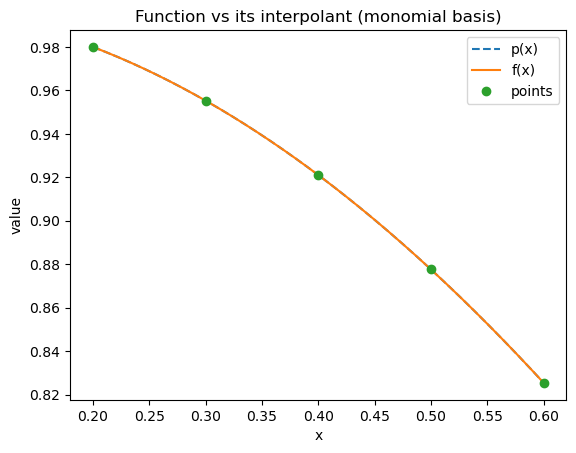

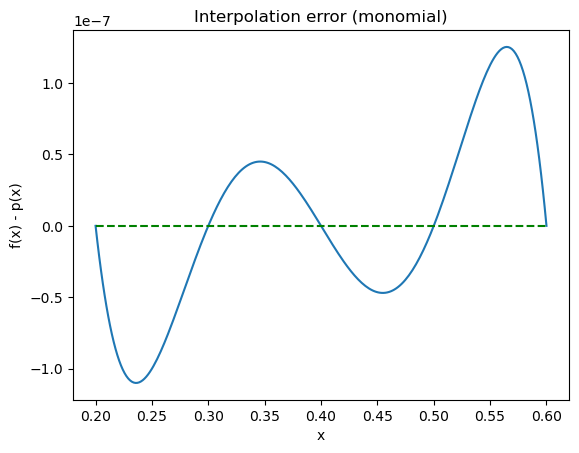

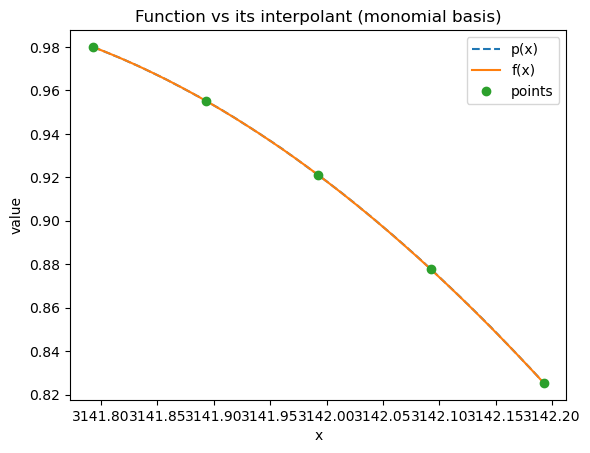

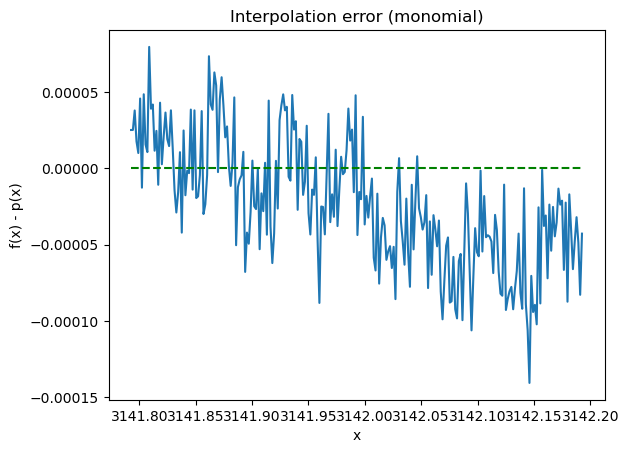

In [22]:

def get_coeff(i, j):
    points = np.arange(i, j+0.1, 0.1)
    a = np.vander((points), increasing=True) 
    y = np.cos(points)
    cond = np.linalg.cond(a)
    print(f"Condition number {i,j}: {cond:.3e}")
    x = np.linalg.solve(a, y)
    return x, points

# construct the polynomial with  mr hormer
def construct_poly(c, x):
    p = np.zeros_like(x)
    for coeff in reversed(c):
        p = p*x + coeff
    return p

def get_error(c, x, f):
    p_vals = construct_poly(c, x)
    f_vals = f(x)
    err = f_vals - p_vals
    return err, p_vals, f_vals    

def plot(s,e):
    coeff, pts = get_coeff(s,e)
    s_pts = np.linspace(s,e, 250)
    er, p, f = get_error(coeff, s_pts, np.cos)
    f_x = np.cos(pts)
   
    # f(x), p(x), points on interval
    plt.figure()
    plt.plot(s_pts, p, '--', label='p(x)')
    plt.plot(s_pts, f, label='f(x)')
    plt.plot(pts, f_x, 'o', label='points')
    plt.title('Function vs its interpolant (monomial basis)')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.legend()

    #error
    plt.figure()
    plt.plot(s_pts, er)
    plt.hlines(y=[0], xmin=np.min(pts), xmax=np.max(pts), colors='g', linestyles="dashed")
    plt.xlabel('x')
    plt.ylabel('f(x) - p(x)')
    plt.title('Interpolation error (monomial)')


# case1
a1 = 0.2
b1 = 0.6
plot(a1, b1)

#case2
a2 = 1000 * np.pi +0.2
b2 = 1000 * np.pi +0.6
plot(a2, b2)

    



As can be seen on the plots, in both cases, the function and its interpolant are the same at the picked points. \
From the Function vs its interpolant plots we can observe that the p(x) and f(x) curves overlap each other at the given scale. THe only visible difference between those plots for case1 and case2 is the interval of x, which is shifted for case2. 



As we can expect, the error is 0 for the values of picked points for both plots (err=0 indicated by the green line). However, that is the only thing that is the same for both plots. The interpolation error for case1 is of magnitude 1e^-7, and the curve has no jagged lines and large jumps in amplitude. The small magnitude and smooth variation of the error indicate that this p(x) is a good approximation to our function. 
 On the other hand, the error curve for case2 oscillates widely, and its magnitude is much greater than that from case1. We can thus deduce that the system is poorly conditioned when the x values are so large.  Even though both cases are analytically equivalent, numerically the second case is clearly much less stable. 



## (b)

Solve the problem with $a = 1000 \cdot \pi + 0.2$ and $b = 1000 \cdot \pi + 0.6$ again, but now using Newton polynomial basis function.

Compare with the second example of part (a).

Condition number: 8.120e+03


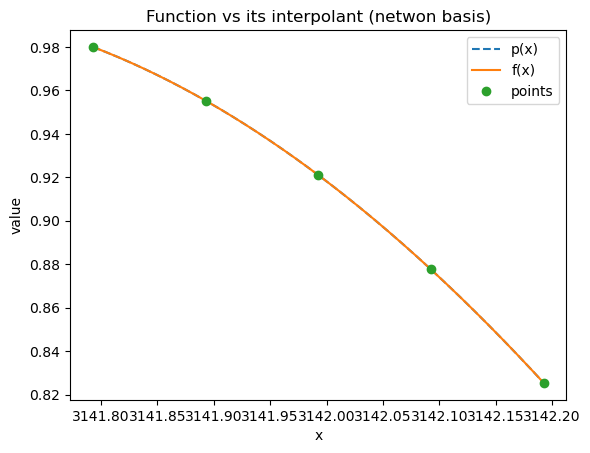

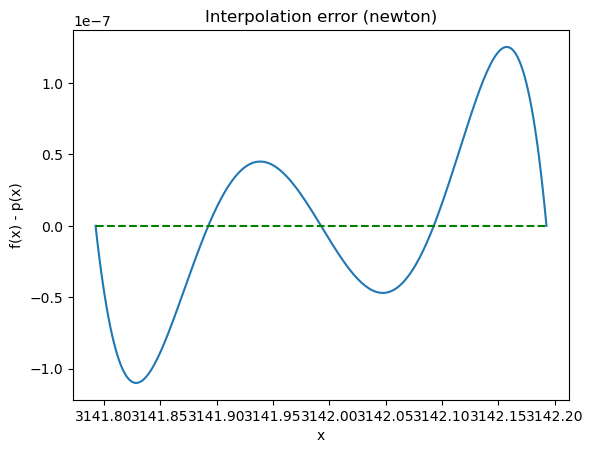

In [23]:
# we already defined a2, b2
def get_coeff_newton(c, d):
    points = np.arange(c, d+0.1, 0.1)
    n = len(points)
    a = np.ones([n, n])
    for k in range(1, n):
        a[:, k] = a[:, k-1] * (points - points[k-1])
    y = np.cos(points)
    cond = np.linalg.cond(a)
    print(f"Condition number: {cond:.3e}")
    x = np.linalg.solve(a, y)
    return x, points

def construct_poly_newton(coeff, points, x_pts):
    x= np.asanyarray(x_pts, dtype=float)
    n = len(coeff)
    p = np.zeros_like(x) +coeff[-1]
    for k in range(n-2, -1, -1):
        p = p*(x - points[k]) +coeff[k]
    return p

def get_error_newton(c, points, x, f):
    p_vals = construct_poly_newton(c, points, x)
    f_vals = f(x)
    err = f_vals - p_vals
    return err, p_vals, f_vals   

def plot_newton(s,e):
    coeff, pts = get_coeff_newton(s,e)
    s_pts = np.linspace(s,e, 250)
    er, p, f = get_error_newton(coeff, pts, s_pts, np.cos)
    f_x = np.cos(pts)
   
    # f(x), p(x), points on interval
    plt.figure()
    plt.plot(s_pts, p, '--', label='p(x)')
    plt.plot(s_pts, f, label='f(x)')
    plt.plot(pts, f_x, 'o', label='points')
    plt.title('Function vs its interpolant (netwon basis)')
    plt.xlabel('x')
    plt.ylabel('value')
    plt.legend()

    #error
    plt.figure()
    plt.plot(s_pts, er)
    plt.hlines(y=[0], xmin=np.min(pts), xmax=np.max(pts), colors='g', linestyles="dashed")
    plt.xlabel('x')
    plt.ylabel('f(x) - p(x)')
    plt.title('Interpolation error (newton)')

plot_newton(a2, b2)

We can now see that although the function vs its interpolant graph looks the same, the error plot has changed. The curve now is identical to the one from case1 from part a), only with a shifted interval. Theefore, the newton basis method for large values of x is a lot more numerically stable than when using the monomial basis.

## (c)

Explain what you see in the error graphs. What kind of errors are dominant in each of the error graphs? Explain the size of the dominant errors in each graph. N.B. a quantitative explanation is requested. Depending on the type of error you may want to have a look at the numbers in the computation of $p$ for finding your explanation.


In [20]:
# a), case1
a, _ = get_coeff(a1, b1)
print(a)

# a), case2
b, _ = get_coeff(a2, b2)
print(b)

# b) - newton
c, _ = get_coeff_newton(a2, b2)
print(c)



[ 9.99980422e-01  2.74315910e-04 -5.01438058e-01  3.43915870e-03
  3.83136268e-02]
[ 1.23163423e+11 -1.57381499e+08  7.54133494e+04 -1.60602276e+01
  1.28256070e-03]
[ 0.98006658 -0.24730089 -0.47727032  0.05707824  0.03831363]


For part a), case1, the error is smooth and very small (max of about 1.25*10^(-7)) The condition number is approximately 1.8 *10^4, and the coefficients (printed above) are between approx 10^(-4) and 1. This means that the rounding error is not very big, and the main error we see on the graph is the trunctuation error.

For case2, what can be seen on the graph is mainly caused by the rounding error: firstly, the condition number is very large (approx 7.6*10^26), and secondly, the coefficients of the p(x) span orders of magnitude from e^(-3) to e^(11). This means, that when computing p(x), we add and subtract very large terms to obtain the final result, which amplifies the rounding error greatly. THerefore, the dominant error here is the rounding error, although the trunctuation error is, of course, still present, but comperatively, much smaller.

For part b), we can see that the error graph is very closly resembling that of case1 from part a). The condition number is around 8.1*10^3, and the coefficients are all of order 1. Thus we can conclude that using the Newton interpolation basis allows us to skip the intermediate steps involving multiple high order additions and subtractions, and reduces the rounding error. Then, the dominant error is once again the trunctuation one, with a size comperable to case1, even despite the large values of x used in this part.

# Exercise: non-standard interpolation method

We consider a non-standard interpolation method. It will be based on regularly spaced interpolation points $t_k = t_0 + k h$, where $k = 0, 1,2,3$ and $h$ is the spacing between the interpolation points.

The idea is to approximate $f(t_0 + \frac{1}{2} h)$ as follows
$$ \tag{1}
  f(t_0 + \frac{1}{2} h) \approx \hat{y} := a_0 f(t_0) + a_1 f(t_1) + a_2 f(t_2) + a_3 f(t_3)
$$
where the vector $a = [a_0, \ldots, a_3]$ is given by

In [40]:
a = np.array( [ 0.35, 0.825, -0.2, 0.025 ] )

## (a)

Let $f(x) = \exp(x)$. Formula (1) can now be used to approximate $y = \exp(\frac{1}{2} h)$, as a combination of $\exp(0)$, $\exp(h)$, $\exp(2h)$ and $\exp(3h)$.

Compute the error for $h = 1, \frac{1}{2}, (\frac{1}{2})^2, ..., (\tfrac{1}{2})^{10}$. Print a table of the results.


## (b)

Does the error of (1) satisfy a power law in $h$, i.e. is it approximately of the form $C h^q$ ($q$ integer)? If so, for what $q$? If yes you can use a common sense approach to estimate $q$.

Power laws can be plotted nicely on a log-log scale. Make such a log-log plot. How can you read of $q$ from the plot? Draw a reference line corresponding to points that exactly satisfy a powerlaw with power $q$.

What power law would be satisfied if we had used standard Lagrange interpolation instead of the non-standard formula (1)?

(**N.B. For the rest of the course you need to know about this technique of analyzing or visualizing power laws using a log-log plot. In particular it is considered part of the material for the digital test.**)
